---

<h1 align="center"><b>Student Performance Prediction</b></h1>

---

## 1. Import Libraries

In [21]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')


## 2. Load Dataset

In [22]:
# Load the dataset
data = pd.read_csv("/kaggle/input/student-performance-data-set/student-por.csv")

# Display first five rows
data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## 3. Basic Info

In [23]:
data.shape

(649, 33)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [25]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [26]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## 4. Prepeocessing

In [27]:
# Importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Copying the dataset to avoid changing the original
data_encoded = data.copy()

# Encoding all categorical (object type) columns
le = LabelEncoder()
for col in data_encoded.columns:
    if data_encoded[col].dtype == 'object':
        data_encoded[col] = le.fit_transform(data_encoded[col])

# Checking the first few rows after encoding
data_encoded.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13


## 5. Data Visualization and Understanding Relationships

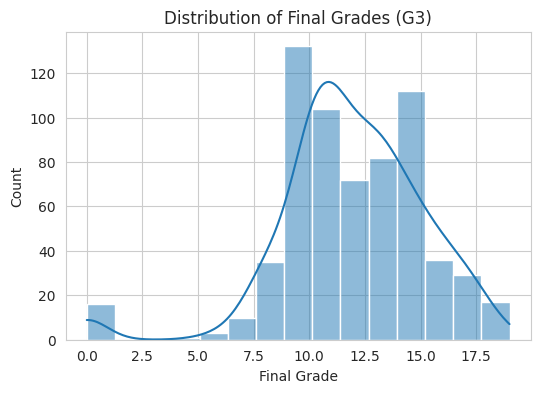

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of the target variable (Final Grade - G3)
plt.figure(figsize=(6,4))
sns.histplot(data['G3'], kde=True, bins=15)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.show()

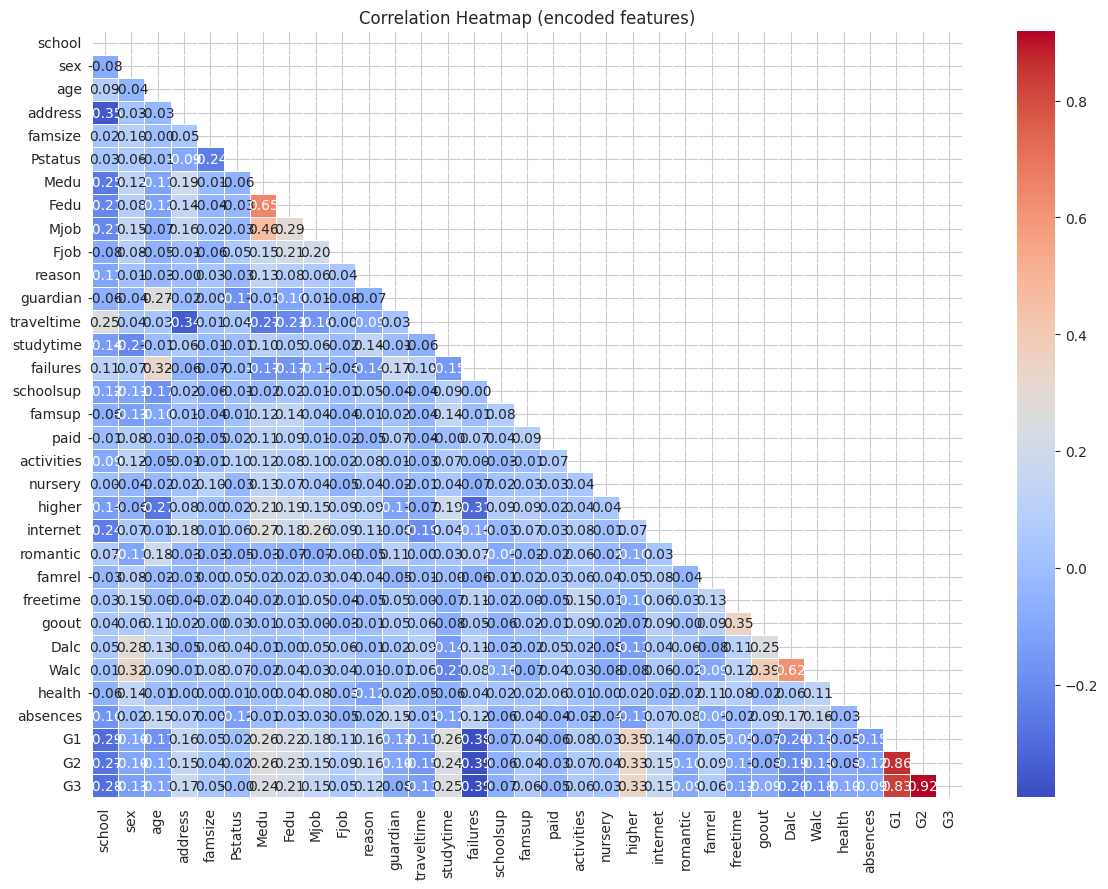

In [29]:
sns.set_style('whitegrid')

# 2. Correlation heatmap (using encoded data for categorical relationships)
plt.figure(figsize=(12,9))
corr = data_encoded.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (encoded features)')
plt.tight_layout()
plt.show()

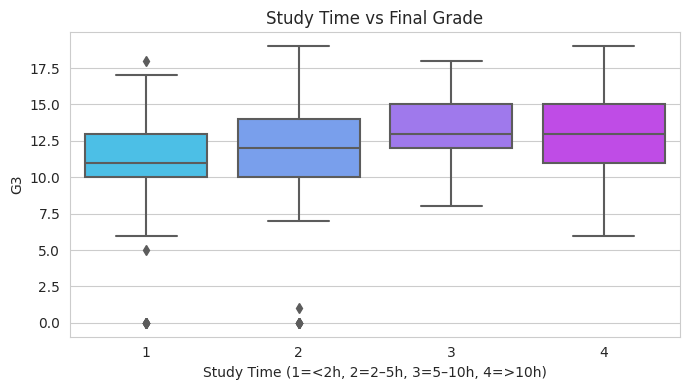

In [30]:
# 3. Study time vs final grade (boxplot)
plt.figure(figsize=(7,4))
sns.boxplot(x='studytime', y=col, data=data, palette='cool')
plt.title('Study Time vs Final Grade')
plt.xlabel('Study Time (1=<2h, 2=2–5h, 3=5–10h, 4=>10h)')
plt.ylabel(col)
plt.tight_layout()
plt.show()

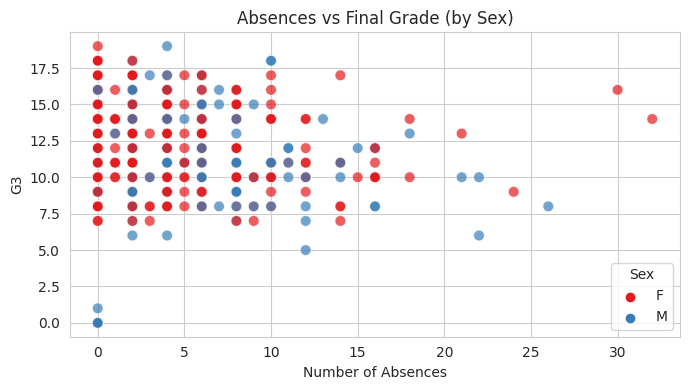

In [31]:
# 4. Absences vs final grade 
plt.figure(figsize=(7,4))
sns.scatterplot(x='absences', y=col, hue='sex', data=data, palette='Set1', s=60, alpha=0.7)
plt.title('Absences vs Final Grade (by Sex)')
plt.xlabel('Number of Absences')
plt.ylabel(col)
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

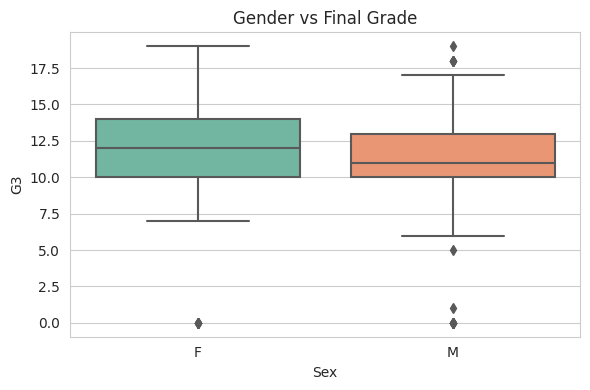

In [32]:

# 5. Gender-wise comparison (boxplot)
plt.figure(figsize=(6,4))
sns.boxplot(x='sex', y=col, data=data, palette='Set2')
plt.title('Gender vs Final Grade')
plt.xlabel('Sex')
plt.ylabel(col)
plt.tight_layout()
plt.show()

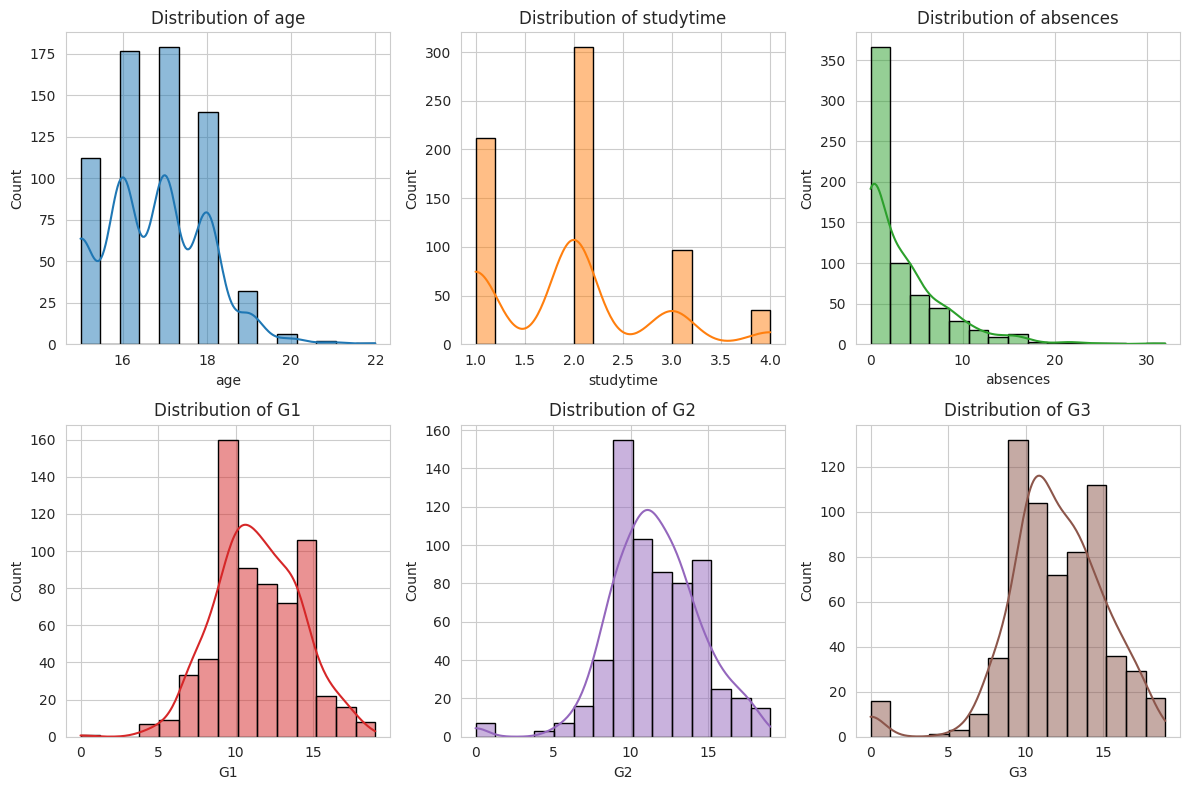

In [33]:
# Separate plots for key numeric features
features = ['age', 'studytime', 'absences', 'G1', 'G2', col]

# 6) Histograms 
plt.figure(figsize=(12, 8))
for i, f in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[f], kde=True, bins=15, color=f'C{i}', edgecolor='k')
    plt.title(f'Distribution of {f}')
plt.tight_layout()
plt.show()

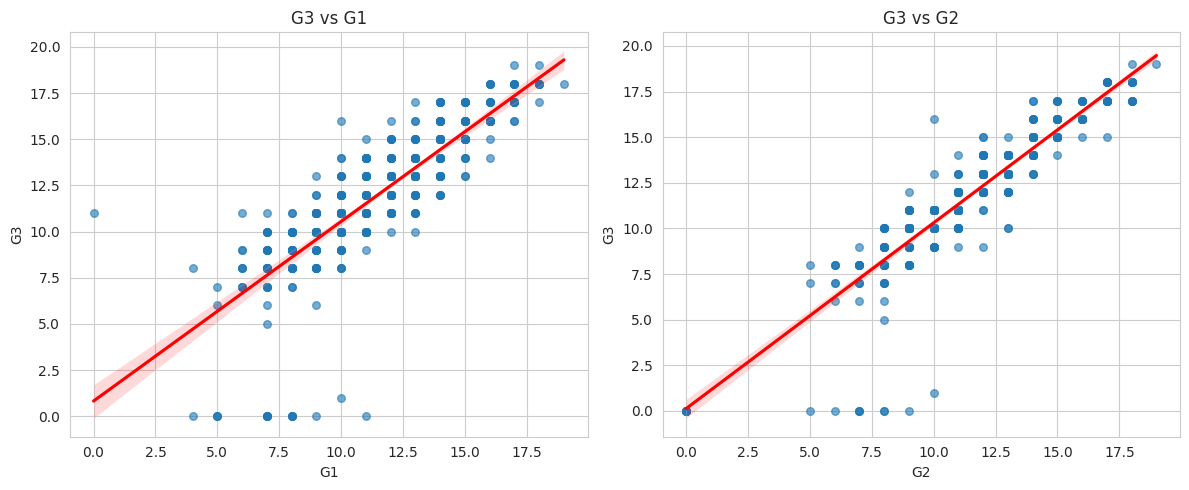

In [34]:
# 7) Scatter + regression: G3 vs G1 and G2
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.regplot(x='G1', y=col, data=data, scatter_kws={'s': 30, 'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('G3 vs G1')
plt.subplot(1, 2, 2)
sns.regplot(x='G2', y=col, data=data, scatter_kws={'s': 30, 'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('G3 vs G2')
plt.tight_layout()
plt.show()


## 6. Feature Selection and Target Variable

In [35]:
# Define the feature columns (X) and target column (y)
X = data_encoded.drop('G3', axis=1)   
y = data_encoded['G3']                

# Checking the shape of features and target
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Shape of X: (649, 32)
Shape of y: (649,)
Training set shape: (454, 32)
Testing set shape: (195, 32)


## 7. Model Building and Training

In [36]:
# Importing necessary libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Initializing models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Training and evaluating each model
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append([name, mae, rmse, r2])

# Creating a results DataFrame
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2 Score"])

# Display results
print("Model Performance Comparison:\n")
print(results_df)


Model Performance Comparison:

               Model       MAE      RMSE  R2 Score
0  Linear Regression  0.784661  1.199421  0.869905
1   Ridge Regression  0.784062  1.198791  0.870042
2   Lasso Regression  0.772095  1.180872  0.873898
3      Random Forest  0.814103  1.259953  0.856442


## 8. Feature importance

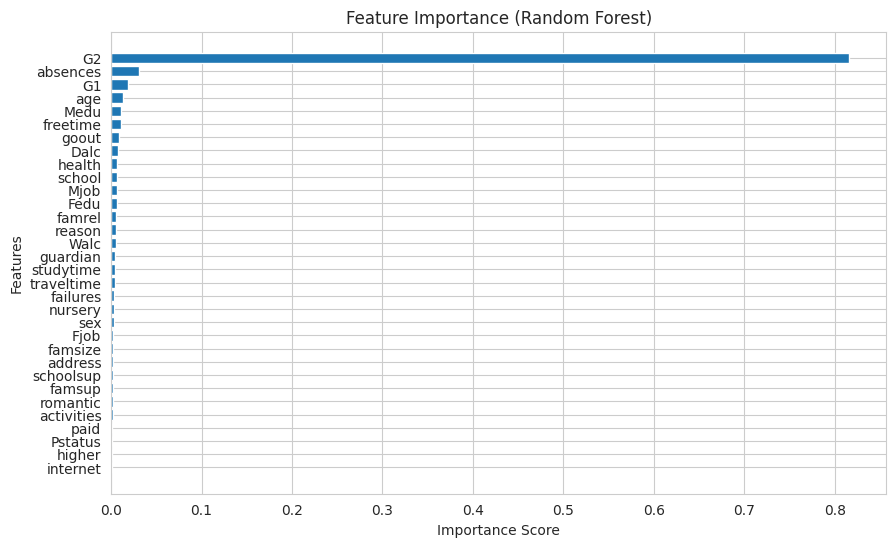

In [37]:
# Feature importance for Random Forest
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature importances from the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


## 9. Model Comparison Visualization

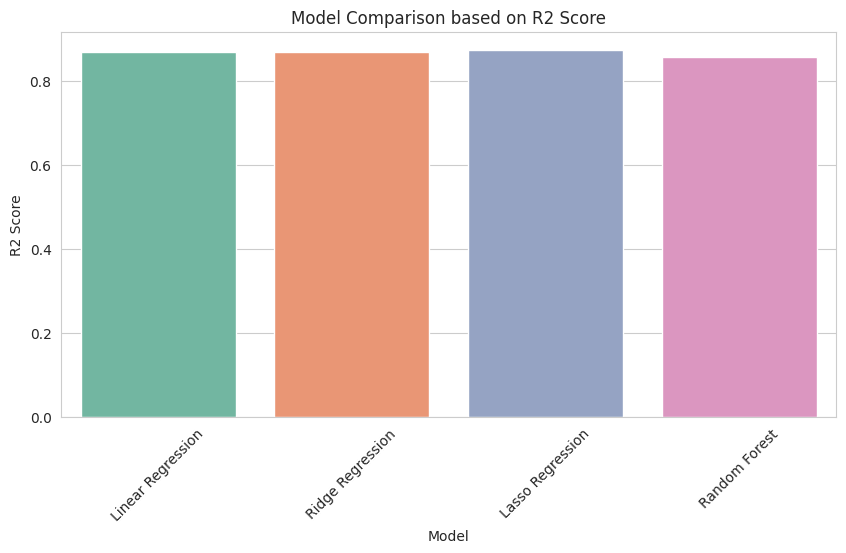

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Custom color palette
colors = sns.color_palette("Set2")

# R2 Score comparison
plt.figure(figsize=(10,5))
sns.barplot(data=results_df, x='Model', y='R2 Score', palette=colors)
plt.title('Model Comparison based on R2 Score')
plt.ylabel('R2 Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

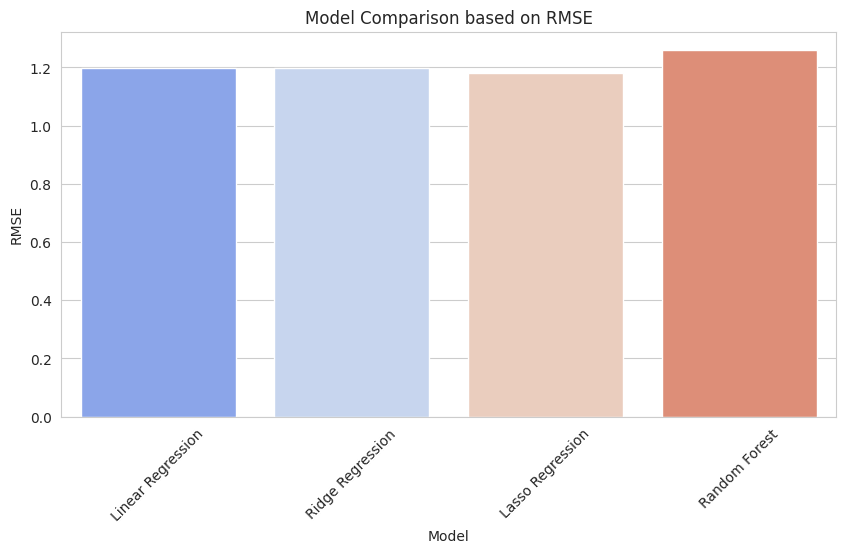

In [39]:
# RMSE comparison
plt.figure(figsize=(10,5))
sns.barplot(data=results_df, x='Model', y='RMSE', palette="coolwarm")
plt.title('Model Comparison based on RMSE')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

## 10. Save the best model

In [40]:
import joblib

# Assuming Lasso Regression is the best model
best_model = models["Lasso Regression"]

# Save the model
joblib.dump(best_model, 'best_student_performance_model.pkl')

# Load the saved model 
loaded_model = joblib.load('best_student_performance_model.pkl')

# Example prediction using an existing test sample 
sample = X_test.iloc[0:1] 
prediction = loaded_model.predict(sample)
print("Predicted Final Grade (G3) for X_test.iloc[0]:", prediction)



Predicted Final Grade (G3) for X_test.iloc[0]: [18.26254732]


## 11. Project Conclusion

This project aimed to predict students’ final grades (G3) using multiple machine learning models based on demographic, social, and academic factors.

After comparing several algorithms (Linear Regression, Ridge, Lasso, Random Forest), **Lasso Regression** achieved the best performance with:
- **MAE:** 0.77  
- **RMSE:** 1.18  
- **R² Score:** 0.8739  

This indicates the model explains approximately 87% of the variance in students’ performance.

Key influential factors include:
- Previous grades (G1, G2)
- Study time
- Number of past failures
- Family support
- Absences  

The final model was saved using `joblib` and can be used for future predictions.  
Overall, this model can support teachers and institutions in identifying at-risk students early and improving learning outcomes.


----